# Regression Modelling | Predicting the Profitability of an Airbnb Listing

###### Key skills in this project: Feature Engineering, Data Cleaning, Data Formatting, Machine Learning, Regression Modelling, Random Forest Regression Modelling, Multiple Linear Regression Modelling & Data Scaling, XGBoost Regression Modelling

## 1. Introduction & Problem Statement
Our client is seeking to purchase a property in Amsterdam to let out as an Airbnb. The purpose of this machine learning project is to provide a model that will predict the profitability of an Airbnb listing. Our model will be used to advise our client on what features to consider when purchasing and listing their property on Airbnb - in terms of location, property specifications, and airbnb/hosting features.

## 2. Background & Context
### 2.1 Airbnb
Airbnb is an online marketplace, which allows property owners to market their properties as rental spaces - primarily for short-stay purposes, however monthly rentals have seen a popular increase in the marketplace. 

Airbnb customers are able to filter out properties on the online marketplace according to their preferences, for example - number of bedrooms, bathrooms, neighbourhood, as well as price. Trends can be identified using the prevelance of these preferences to identify what makes a property popular, in terms of property specifications and price. 

In order to have a profitable Airbnb listing, there must be an optimal balance between the number of stays and price. For example, affordable listings will inadvertenly result in more bookings. However, properties that are perhaps too affordable may be less popular, as they may be viewed to provide an inferior living experience in comparison. On the other end of the spectrum, expensive listings may generate more revenue per stay, however bookings may be less prevalent due to the price - this will have an impact on the revenue generated for that property.

### 2.2 Measure of Profitability
The dataset that will be used in this project does not have a profitability. Thus, a profitability feature will be engineered, based on the following formula:

$$Profitability = \frac{Price \cdot Minimum Nights \cdot Reviews}{Listing Tenure}$$

##### Variable Definitions:
- Price: Listing Price per Night
- MinimumNights: Minimum Nights Allowed per Stay
- Reviews: Number of Reviews Posted
- ListingTenure: Number of Days Since the First Review

This can be interpretted as the overall minimum average revenue generated per day for a listing. However, for this project, it will be referred to as profitability as the revenue generated may be misleading due to the assumptions that the formula is based on (listed below).

##### Assumptions:
- The listing price has been consistent for the tenure of the listing
- The Minimum Nights requirement has been consisitent for the tenure of the listing
- The Ratio of Reviews posted, to total Stays is approximately equal for all listings

## 3. Dataset
The dataset used for this analysis is the public Amsterdam listings dataset from "Inside Airbnb" (http://insideairbnb.com/get-the-data.html)

## 4. Methodology
The following methodology will be followed for this project:

#### 4.1 Data Preperation
1. Raw feature selection - Raw features will be selected from the large dataset to simplify the analysis. Irrelevant features will be based on intuition.
2. Checking for duplicates
3. Formatting columns with incorrect data types
4. Extracting data that is relevant to the business problem
5. Feature Engineering - Profitability feature, and explore what other features should be engineered
7. Imputing missing values (provided data leakage is not a risk - otherwise to be conducted after train/test split)

#### 4.2 Exploratory Data Analysis
Determine relationships between profitability:
1. Location
2. Property Specifications
3. Airbnb specific features

#### 4.3 Modelling
1. Encoding categorical data
2. Splitting data into train/test subsets
3. Model with Random Forest Regression
4. Model with Boosted Random Forest Regression
5. Model with Multiple Linear Regression

#### 4.4 Model Evaluation
1. Evaluate each Model used
2. Select best model
3. Identify features that carry the greatest explanotory weights for profitability.

#### 4.5 Conclusion & Recommendations
1. Conclude model findings
2. Make recommendations for model improvement
3. Recommend property specifications that promote profitability

## 5. Data Preperation

### 5.2 Load Dataset

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set()
sns.set_palette('GnBu_d')
sns.set_style('white')

In [2]:
#loading the dataset
data = pd.read_csv('amsterdamlistings.csv')

#displaying first 5 rows of dataframe
pd.set_option('display.max_columns', None)
data.head()

C:\Users\Tasmiya Osman\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20200608201310,2020-06-10,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,NaN,NaN,https://a0.muscache.com/im/pictures/10272854/8...,NaN,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,NaN,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN,$59.00,NaN,"$1,500.00",$200.00,$60.00,1,$20.00,3,15,3,3,1125,1125,3.0,1125.0,4 months ago,t,21,48,78,158,2020-06-10,278,19,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.04
1,9693,https://www.airbnb.com/rooms/9693,20200608201310,2020-06-10,Top Location on Canal (Center Flat),You will love your stay here. It is a beautifu...,This beautiful apartment in the heart of 17th ...,You will love your stay here. It is a beautifu...,none,You will be on a beautiful quite canal and wil...,NaN,You will be right next to all transportations ...,The whole flat will be yours. We stay in anoth...,Prior to arrival we need to understand how you...,Please introduce yourself a little bit when yo...,NaN,NaN,https://a0.muscache.com/im/pictures/180260/e8e...,NaN,32366,https://www.airbnb.com/users/show/32366,Sabine And Sander,2009-08-18,"Amsterdam, Noord-Holland, The Netherlands","Hello, we like to share the beautiful things i...",within an hour,100%,92%,t,https://a0

### 5.2 Raw Feature Selection

In [3]:
#displaying number of columns
len(data.columns)

106

There are 106 different features in our raw dataframe. Some of these features are not beneficial to our problem statement for assessing profitability. For example, listing_url,scrape_id and country code are features that will not influence our profitability. Thus, we will select the relevant features for our analysis.

In [4]:
#selecting the relevant columns
cols_to_keep = ['id','experiences_offered', 'host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','price','weekly_price','monthly_price','security_deposit','cleaning_fee','minimum_nights','availability_365','number_of_reviews','first_review','last_review','review_scores_rating','host_has_profile_pic','host_identity_verified','amenities','square_feet','instant_bookable','is_business_travel_ready','cancellation_policy','host_response_time','is_location_exact','host_id']
data = data[cols_to_keep]

#displaying the first five rows of our revised dataframe
data.head()

,id,experiences_offered,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,host_has_profile_pic,host_identity_verified,amenities,square_feet,instant_bookable,is_business_travel_ready,cancellation_policy,host_response_time,is_location_exact,host_id
0,2818,none,within an hour,100%,100%,t,Indische Buurt,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Apartment,Private room,2,1.5,1.0,2.0,$59.00,NaN,"$1,500.00",$200.00,$60.00,3,158,278,2009-03-30,2020-02-14,98.0,t,f,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN,t,f,strict_14_with_grace_period,within an hour,f,3159
1,9693,none,within an hour,100%,92%,t,Grachtengordel,Centrum-West,52.37802,4.89270,Apartment,Entire home/apt,2,1.5,1.0,1.0,$119.00,$780.00,"$1,960.00",$150.00,$45.00,3,17,55,2010-04-05,2018-06-29,99.0,t,t,"{Wifi,Kitchen,""Paid parking off premises"",Heat...",646.0,t,f,moderate,within an hour,t,32366
2,20168,none,within an hour,90%,97%,f,Grachtengordel,Centrum-Oost,52.36509,4.89354,Townhouse,Private room,2,1.0,1.0,1.0,$100.00,NaN,NaN,NaN,NaN,1,31,340,2010-03-02,2020-04-09,89.0,t,f,"{TV,Internet,Wifi,""Paid parking off premises"",...",NaN,t,f,strict_14_with_grace_period,within an hour,t,59484
3,25428,none,NaN,NaN,53%,t,Grachtengordel,Centrum-West,52.37297,4.88339,Apartment,Entire home/apt,3,1.0,1.0,1.0,$125.00,$650.00,"$2,000.00",$300.00,$40.00,14,212,5,2018-01-21,2020-02-09,100.0,t,f,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",NaN,f,f,strict_14_with_grace_period,NaN,f,56142
4,27886,none,within a few hours,100%,100%,t,Westelijke Eilanden,Centrum-West,52.38761,4.89188,Houseboat,Private room,2,1.5,1.0,1.0,$135.00,$810.00,"$2,500.00",$0.00,$0.00,2,235,217,2012-01-09,2020-03-02,99.0,t,t,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke ala...",NaN,t,f,strict_14_with_grace_period,within a few hours,t,97647


In [5]:
#examining experiences_offered feature - the appears to be many 'none' values
data.experiences_offered.value_counts()

none    19352
Name: experiences_offered, dtype: int64

All values in the experiences_offered feature are set to none - this feature can be dropped

In [6]:
#dropping experiences_offered
data.drop('experiences_offered', axis=1, inplace=True)

In [7]:
#displaying number of columns
len(data.columns)

36

We have reduced the raw dataframe to a total of 36 relevant features to our business problem. 

### 5.3 Duplicated Data
Some hosts list their properties more than once. We will use listing id, and location (with host_id & bedrooms) to check for duplicated observations. The conditions for location is more complex, as some hosts may own more than 1 property in the same apartment block or in close proximity.

In [8]:
#checking based on id
data.id.duplicated().value_counts()

False    19352
Name: id, dtype: int64

In [9]:
#checking based on location, host_id, and number of bedrooms
data[(data.longitude.duplicated()==True) & (data.latitude.duplicated()==True) & (data.host_id.duplicated==True) & (data.bedrooms.duplicated==True)]

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,host_has_profile_pic,host_identity_verified,amenities,square_feet,instant_bookable,is_business_travel_ready,cancellation_policy,host_response_time,is_location_exact,host_id


There appears to be no duplicated observations.

### 5.4 Formatting Feature Data Types

In [10]:
#displaying data types in our dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19352 entries, 0 to 19351
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19352 non-null  int64  
 1   host_response_time        4496 non-null   object 
 2   host_response_rate        4496 non-null   object 
 3   host_acceptance_rate      12570 non-null  object 
 4   host_is_superhost         19341 non-null  object 
 5   neighbourhood             18583 non-null  object 
 6   neighbourhood_cleansed    19352 non-null  object 
 7   latitude                  19352 non-null  float64
 8   longitude                 19352 non-null  float64
 9   property_type             19352 non-null  object 
 10  room_type                 19352 non-null  object 
 11  accommodates              19352 non-null  int64  
 12  bathrooms                 19346 non-null  float64
 13  bedrooms                  19334 non-null  float64
 14  beds  

There are object datatypes in our dataframe that should be numerical: host_response_rate, price etc. We will convert them to ints/floats. 

In [11]:
#converting price columns into floats
price_cols = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee']

for col in price_cols:
    data[col] = data[col].str.replace('$','').str.replace(',','').astype('float')

Text(0.5, 1.0, 'Price Distribution')

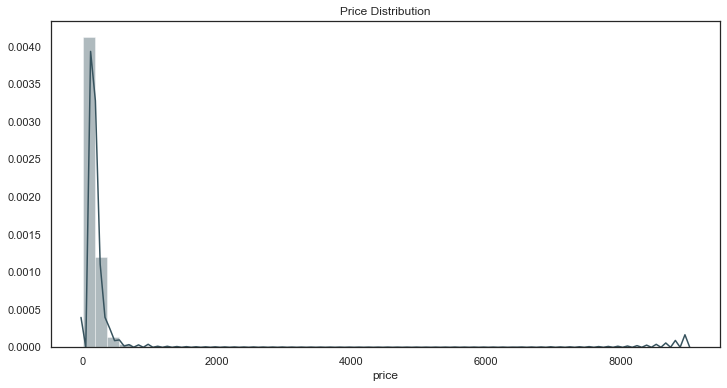

In [12]:
#viewing distribution of price
plt.figure(figsize=(12,6))
sns.distplot(data.price)
plt.title('Price Distribution')

In [13]:
#getting price mean
data.describe()

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,minimum_nights,availability_365,number_of_reviews,review_scores_rating,square_feet,host_id
count,1.935200e+04,19352.000000,19352.000000,19352.000000,19346.000000,19334.000000,19269.000000,19352.000000,2275.000000,1225.000000,13611.000000,15892.000000,19352.000000,19352.000000,19352.000000,16738.000000,345.000000,1.935200e+04
mean,1.980185e+07,52.365346,4.889703,2.859291,1.191926,1.453605,1.777207,165.933340,822.372308,2591.318367,231.389244,39.552794,3.509663,61.542115,24.924607,95.189987,544.881159,6.324503e+07
std,1.215362e+07,0.016475,0.035910,1.294356,0.391324,0.894123,1.409297,236.859423,456.303730,1546.357293,408.735510,25.676235,13.551495,108.154091,53.892550,6.688861,528.449020,7.990810e+07
min,2.818000e+03,52.289270,4.755720,1.000000,0.000000,0.000000,0.000000,5.000000,89.000000,349.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,3.159000e+03
25%,9.800166e+06,52.355090,4.863935,2.000000,1.000000,1.000000,1.000000,99.000000,550.000000,1650.000000,0.000000,25.000000,2.000000,0.000000,2.000000,93.000000,0.000000,9.012687e+06
50%,1.871935e+07,52.364690,4.887185,2.000000,1.000000,1.000000,1.000000,130.000000,700.000000,2200.000000,150.000000,39.000000,2.000000,0.000000,9.000000,97.000000,484.000000,2.700337e+07
75%,2.917511e+07,52.375270,4.909343,4.000000,1.500000,2.000000,2.000000,188.000000,950.000000,3000.000000,300.000000,50.000000,3.000000,87.000000,23.000000,100.000000,807.000000,8.357914e+07
max,4.370908e+07,52.425120,5.027690,17.000000,8.000000,12.000000,32.000000,9000.000000,6000.000000,20000.000000,4615.000000,600.000000,1001.000000,365.000000,850.000000,100.000000,2691.000000,3.491220e+08


Our client is not looking to purchase a property that she can rent out an exorbetently high price. As seen in the visual above, there are outliers that will provide noise to our data. The average listing price is $166 a night - We will limit our analysis to 300.

In [14]:
#selecting data with a price of $300 or less
data = data[data.price <= 300]
data.index = range(len(data))

In [15]:
#converting date strings to dates
date_cols = ['first_review','last_review']

for col in date_cols:
    data[col] = pd.to_datetime(data[col])

In [16]:
#creating a dataframe with host acceptance rate for easy manipulation
host_acceptance_rate = pd.DataFrame(data.host_acceptance_rate)

#removing all NaN
host_acceptance_rate.dropna(axis=0, inplace=True)

#removing percentage sign & converting into float
host_acceptance_rate = host_acceptance_rate.host_acceptance_rate.str.replace('%',"").astype(float)

#dropping old host_acceptance_rate column from dataframe
data.drop('host_acceptance_rate', axis=1, inplace=True)
data['host_acceptance_rate'] = host_acceptance_rate

In [17]:
#creating a dataframe with host response rate for easy manipulation
host_response_rate = pd.DataFrame(data.host_response_rate)

#removing all NaN
host_response_rate.dropna(axis=0, inplace=True)

#removing percentage sign & converting into float
host_response_rate = host_response_rate.host_response_rate.str.replace('%',"").astype(float)

#dropping old host_acceptance_rate column from dataframe
data.drop('host_response_rate', axis=1, inplace=True)
data['host_response_rate'] = host_response_rate

We will deal with categorical and boolean data when Encoding.

### 5.5 Missing Values

In [18]:
#checking for missing values
data.isnull().sum() 

id                              0
host_response_time          14153
host_is_superhost              10
neighbourhood                 745
neighbourhood_cleansed          0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       5
bedrooms                       18
beds                           78
price                           0
weekly_price                16025
monthly_price               17034
security_deposit             5480
cleaning_fee                 3271
minimum_nights                  0
availability_365                0
number_of_reviews               0
first_review                 2111
last_review                  2111
review_scores_rating         2317
host_has_profile_pic           10
host_identity_verified         10
amenities                       0
square_feet                 17877
instant_bookable                0
is_business_tr

In [19]:
#dealing with host_is_superhost - if NaN we will set it to False
superhost = data.host_is_superhost.fillna(value='f')
data['superhost'] = superhost
data.drop('host_is_superhost', axis=1, inplace=True)

#dropping square_feet feature - 98% of data is missing
data.drop('square_feet',axis=1, inplace=True)

Around 2111 observations have missing values for first_review and last_review - this indicates that these listings are new, and will thus not provide much insight when modelling profitability. We will drop these observations.

In [20]:
#dropping new listings
data.dropna(subset=['first_review'],axis=0, inplace=True)

#checking number of reviews for listings with no scores ratings
data[data.review_scores_rating.isnull()].number_of_reviews.value_counts()

1    170
2     23
5      6
3      6
4      2
Name: number_of_reviews, dtype: int64

Properties that have 5 or less reviews appear to not qualify for a Review Rating. As such, we will drop these observations as well, since they can be considered to be new listings.

In [21]:
#selecting data with more than 5 reviews
data = data[data.number_of_reviews > 5]
data.index = range(len(data))

73% of observations do not have a host_response_time or rate. Imputing these values may lead to misleading results. As a result, we will drop these two features.

In [22]:
#dropping host_response_time and host_response_rate
data.drop(['host_response_time', 'host_response_rate'], axis=1, inplace=True)

In [23]:
#setting NaN host_identity_verified values to 'f'
data.host_identity_verified.fillna(value='f',inplace=True)

We will assume that listings with missing cleaning fees and security deposits do not require additional funds

In [24]:
#Setting NaN security deposit values to 0
data.security_deposit.fillna(0, inplace=True)

#Setting NaN cleaning fee values to 0
data.cleaning_fee.fillna(0, inplace=True)

There are a few observations with missing values for bedrooms, bathrooms, and beds. Lets take a closer look.

In [25]:
#observations where bathrooms aren't recorded
data[data.bathrooms.isnull()]

,id,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,host_has_profile_pic,host_identity_verified,amenities,instant_bookable,is_business_travel_ready,cancellation_policy,is_location_exact,host_id,host_acceptance_rate,superhost
106,291752,Oosterparkbuurt,Oud-Oost,52.35279,4.91256,Apartment,Private room,2,NaN,1.0,1.0,99.0,NaN,NaN,0.0,0.0,3,365,209,2012-01-02,2020-03-12,97.0,t,f,"{TV,""Cable TV"",Internet,Wifi,Heating,Washer,""S...",f,f,moderate,t,1511330,100.0,t
108,294468,Oost,Centrum-Oost,52.36294,4.90944,Apartment,Entire home/apt,4,NaN,1.0,1.0,175.0,700.0,2200.0,200.0,60.0,3,0,14,2015-08-12,2017-06-12,96.0,t,f,"{Kitchen,Heating,""Family/kid friendly"",""transl...",f,f,moderate,t,1509881,NaN,f
269,652660,Oud-West,De Baarsjes - Oud-West,52.36637,4.87755,Apartment,Entire home/apt,2,NaN,1.0,1.0,115.0,NaN,NaN,0.0,0.0,6,0,8,2012-08-27,2012-11-24,100.0,t,t,"{Wifi,Kitchen,Heating,Washer}",f,f,moderate,t,2369370,NaN,f
375,793845,Oud-West,De Baarsjes - Oud-West,52.37385,4.85843,Apartment,Entire home/apt,2,NaN,1.0,1.0,80.0,NaN,NaN,100.0,0.0,1,41,57,2012-11-28,2020-03-08,98.0,t,f,"{TV,Wifi,Kitchen,Heating,Washer}",f,f,flexible,t,3826985,38.0,f


In [26]:
#observations where bedrooms aren't recorded
data[data.bedrooms.isnull()]

,id,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,host_has_profile_pic,host_identity_verified,amenities,instant_bookable,is_business_travel_ready,cancellation_policy,is_location_exact,host_id,host_acceptance_rate,superhost
44,83814,De Pijp,De Pijp - Rivierenbuurt,52.35632,4.88921,Apartment,Entire home/apt,2,1.0,NaN,1.0,98.0,650.0,NaN,100.0,20.0,2,59,157,2011-04-18,2020-03-03,94.0,t,f,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",f,f,moderate,f,457263,47.0,f
746,1496082,De Pijp,De Pijp - Rivierenbuurt,52.35650,4.89323,Apartment,Entire home/apt,2,1.0,NaN,1.0,89.0,900.0,2500.0,0.0,25.0,4,156,16,2013-09-05,2019-05-26,95.0,t,t,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",f,f,flexible,f,6497853,0.0,f
963,2065321,Oud-Zuid,De Pijp - Rivierenbuurt,52.35266,4.89319,Apartment,Entire home/apt,2,1.0,NaN,1.0,170.0,185.0,NaN,0.0,45.0,3,0,27,2014-01-04,2020-02-14,97.0,t,f,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",f,f,flexible,t,8493544,71.0,f
2898,7597832,Hoofddorppleinbuurt,Zuid,52.34890,4.84855,Apartment,Entire home/apt,2,1.0,NaN,1.0,120.0,500.0,NaN,500.0,25.0,3,0,11,2015-08-11,2019-08-05,96.0,t,f,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",f,f,moderate,f,32775106,67.0,f


In [27]:
#observations where beds aren't recorded
data[data.beds.isnull()]

,id,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,host_has_profile_pic,host_identity_verified,amenities,instant_bookable,is_business_travel_ready,cancellation_policy,is_location_exact,host_id,host_acceptance_rate,superhost
4843,13758770,Stadionbuurt,Zuid,52.34420,4.86119,Apartment,Private room,2,1.0,1.0,NaN,139.0,NaN,NaN,0.0,45.0,1,364,35,2016-10-11,2020-02-08,98.0,t,t,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",f,f,flexible,f,7233992,80.0,f
11027,40610878,Oud-West,De Baarsjes - Oud-West,52.36321,4.86615,Apartment,Private room,1,1.0,1.0,NaN,70.0,NaN,NaN,0.0,0.0,1,0,6,2020-01-04,2020-01-24,97.0,t,f,"{TV,Wifi,Kitchen,Heating,Essentials,Hangers,""H...",t,f,moderate,t,197928567,100.0,t
11058,41366236,Amsterdam Centrum,Centrum-West,52.37633,4.89383,Apartment,Private room,2,1.0,1.0,NaN,150.0,NaN,NaN,0.0,0.0,2,33,19,2020-01-23,2020-06-04,81.0,t,f,"{TV,Wifi,Heating,""Smoke alarm"",""Carbon monoxid...",t,f,strict_14_with_grace_period,t,325213924,96.0,f
11065,41834259,De Pijp,De Pijp - Rivierenbuurt,52.35297,4.89124,Condominium,Private room,2,1.0,1.0,NaN,76.0,NaN,NaN,0.0,0.0,1,0,11,2020-02-02,2020-03-15,88.0,t,f,"{Wifi,""Indoor fireplace"",Essentials,Shampoo,Ha...",t,f,flexible,f,313110546,100.0,f
11072,42514046,Grachtengordel,Centrum-Oost,52.36445,4.87956,Serviced apartment,Entire home/apt,2,1.0,0.0,NaN,200.0,NaN,NaN,100.0,0.0,2,0,6,2020-03-17,2020-05-19,100.0,t,f,"{TV,""Cable TV"",Wifi,Heating,""Smoke alarm"",""Car...",t,f,strict_14_with_grace_period,t,178187873,98.0,f


- The observations where there are no bedrooms recorded will be classified as studios (bedrooms = 0) - Decision Factor: these properties can only accomodate 2 people.
- Observations with no bathrooms will be set to 1 - Decision Factor: They are all 1 bedrooms
- Observations with no beds will be set to 1 - Decision Factor: Can only accomodate 2 people.

In [28]:
#filling in missing bedrooms
data.bedrooms.fillna(0, inplace=True)

#filling in missing bathrooms
data.bathrooms.fillna(1, inplace=True)

#filling in missing beds
data.beds.fillna(1, inplace=True)

In [29]:
#hosts with NaN profile pics will be set to false
data.host_has_profile_pic.fillna(value='f', inplace=True)

Finally, we must decide what to do with the missing values for weekly_price and monthly_price. When we calculate the profitability feature, we will use an algorithm to calculate the price depending on the minimum duration of stay and whether the a special price is available or not. We will set the null values for these two features to 0 - this will allow us to identify whether there is a special price or not in our algorithm.

In [30]:
#setting null values for weekly and monthly prices to 0
data.weekly_price.fillna(0, inplace=True)
data.monthly_price.fillna(0, inplace=True)

In [31]:
#checking null values
data.isnull().sum()

id                             0
neighbourhood                396
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
price                          0
weekly_price                   0
monthly_price                  0
security_deposit               0
cleaning_fee                   0
minimum_nights                 0
availability_365               0
number_of_reviews              0
first_review                   0
last_review                    0
review_scores_rating           0
host_has_profile_pic           0
host_identity_verified         0
amenities                      0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
is_location_exact              0
host_id                        0
host_accep

There are still missing values for host_acceptance_rate and neighbourhood -  These missing values will be imputed using:
- the mean for host_acceptance_rate
- the mode for the neighbourhood in the missing values neighbourhood_cleansed designation
Due to data leakage, this will be performed after the train-test split of our dataset

### 5.6 Dealing with Boolean Features
if there is a high degree of variable imbalance for some of the boolean features, these features will not be useful for analysis.

In [32]:
#selecting boolean features
boolean_cols = ['superhost','host_has_profile_pic','host_identity_verified','instant_bookable','is_business_travel_ready','is_location_exact']

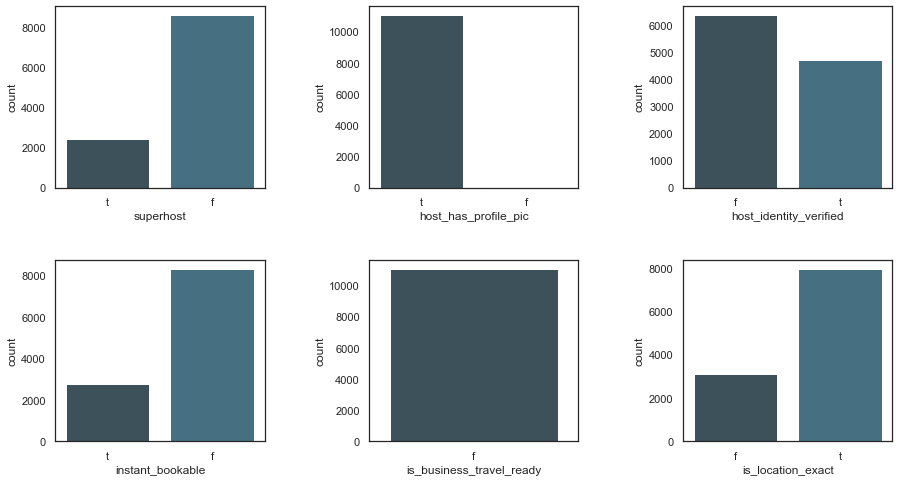

In [33]:
#plotting boolean features
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
for i in range(1,7):
    plt.subplot(2,3,i)
    sns.countplot(data[boolean_cols[i-1]])

- Though the host_is_superhost feature is highly imbalanced, we will retain it. It may hold importance in our model.
- We will drop the host_has_profile_pic & is_business_travel_ready as they do not offer much benefit to our model

In [34]:
#dropping irrelevant columns
data.drop(['host_has_profile_pic','is_business_travel_ready'],axis=1, inplace=True)

We need to convert the boolean features into numeric quantities. We will apply ordinal encoding to these variables.

In [35]:
#importing ordinal encoder & creating an instance of OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [36]:
#selecting features to encode
cols_encode = ['superhost','host_identity_verified','instant_bookable','is_location_exact']
boolean_df = data[cols_encode]

In [37]:
#encoding the boolean_df
encoded_boolean_df = pd.DataFrame(ordinal_encoder.fit_transform(boolean_df), columns=cols_encode)

#adding the boolean_df to the original dataframe and dropping the non-encoded features
data.drop(cols_encode, axis=1, inplace=True)
data.index = range(len(data))
data = pd.concat([data,encoded_boolean_df],axis=1)

### 5.7 Feature Engineering
To create our profitability feature we need the following information:
- Price (Achieved)
- Min_Nights (Achieved)
- Number_of_Reviews (Achieved)
- Days since first review (Not-Achieved)

##### 5.7.1 Creating a Tenure/Age Feature

In [38]:
#this data was scraped on 10/June/2020 - we must get the age in months for each listing
age = []

for i in range(len(data)):
    scrape_date = datetime(2020,4,1)
    age_days = (scrape_date - data.first_review.loc[i]).days
    age.append(age_days)

#appending age list to dataframe
data['age'] = age

##### 5.7.2 Creating a Profitability Feature
Care must be taken with this feature. There is a risk that the profitability feature may generate high values for fairly new listings that have gotten enough many stays in their period of time. As such, to mitigate this risk, we should look at listings that are older than 6 months, to provide a balanced profitability value.

In [39]:
#selecting observations that are older than 6 months (182 days)
data = data[data.age>182]

#resetting our index
data.index = range(len(data))

Considering there are special prices for weekly and monthly stays for some listings, these prices must be taken into consideration when calculating the profitability.

In [40]:
#profitability calculation

profitability = []

for i in range(len(data)):
    observation = data.loc[i]
    age = observation.age
    
    #monthly lisitings profitability
    if (observation.minimum_nights > 28):
        if (observation.monthly_price == 0):
            if (observation.weekly_price == 0):
                prof = (observation.price * observation.minimum_nights * observation.number_of_reviews)/(observation.age)
                profitability.append(prof)
            else:
                prof = (observation.weekly_price * (observation.minimum_nights/7) * observation.number_of_reviews)/(observation.age)
                profitability.append(prof)
        else:
            prof = (observation.monthly_price * (observation.minimum_nights/30) * observation.number_of_reviews)/(observation.age)
            profitability.append(prof)
            
    #weekly listings profitability        
    elif (observation.minimum_nights > 7):
        if (observation.weekly_price == 0):
            prof = (observation.price * observation.minimum_nights * observation.number_of_reviews)/(observation.age)
            profitability.append(prof)
        else:
            prof = (observation.weekly_price * (observation.minimum_nights/7) * observation.number_of_reviews)/(observation.age)
            profitability.append(prof)
            
    #no weekly or monthly special prices
    else:
        prof = (observation.price * observation.minimum_nights * observation.number_of_reviews)/(observation.age)
        profitability.append(prof)

data['profitability'] = profitability

##### 5.7.3 Special Prices for Weekly & Monthly stays
Creating a feature to indicate whether special weekly or monthly prices are available

In [41]:
#creating weekly special feature
weekly_special = []

for i in range(len(data)):
    observation = data.weekly_price.loc[i]
    if observation == 0:
        weekly_special.append(0)
    else:
        weekly_special.append(1)

data['weekly_special'] = weekly_special

In [42]:
#creating monthly special feature
monthly_special = []

for i in range(len(data)):
    observation = data.monthly_price.loc[i]
    if observation == 0:
        monthly_special.append(0)
    else:
        monthly_special.append(1)

data['monthly_special'] = monthly_special

##### 5.7.4 Cleaning Fee & Security Deposit
Some customers may examine the cleaning fee & security deposit in comparison to the actual price of the stay. As such, the cleaning fee & security deposit feautes will be converted to a ratio for the price of one complete stay.

In [43]:
#creating cleaning ratio list
cleaning_ratio = []

for i in range(len(data)):
    observation =  data.loc[i]
    ratio = (observation.cleaning_fee)/(observation.price*observation.minimum_nights)
    cleaning_ratio.append(ratio)

#dropping cleaning fee feature
data.drop('cleaning_fee', axis=1, inplace=True)

#appending cleaning_ratio feature
data['cleaning_ratio'] = cleaning_ratio

In [44]:
#creating security deposit ratio list
security_ratio = []

for i in range(len(data)):
    observation =  data.loc[i]
    ratio = (observation.security_deposit)/(observation.price*observation.minimum_nights)
    security_ratio.append(ratio)

#dropping security deposit feature
data.drop('security_deposit', axis=1, inplace=True)

#appending security_ratio feature
data['security_ratio'] = security_ratio

#### 5.7.5 The Amenities Feature
The amenities feature is a set of amenities which are formed as one string. We will need to process this feature, so that it is meaningful to our analysis.

We will do this by identifying all unique amenities, and then creating a dataframe using these unique amenities as columns. We will then loop through our amenities for each observation and input a value of '1' where that amenity is present in that listing (Encoding).

In [45]:
#Removing punctiation from each observation's amenity string
amenities = (data.amenities.str.replace('{',"").str.replace('}',"").str.replace('"',""))

#placing each amenity string in a dataframe and splitting the string into words
amenities_df = pd.DataFrame(amenities)
amenities_list = (amenities_df.amenities.str.split(',')).to_list()

In [46]:
#getting the unqiue amenities using a for loop
unique_amenities = []

for i in range(len(amenities_list)):
    for j in range(len(amenities_list[i])):
        if amenities_list[i][j] not in unique_amenities:
            unique_amenities.append(amenities_list[i][j])

In [47]:
#creating a new dataframe with the unique amenities as columns
unique_amenities_df = pd.DataFrame(columns=unique_amenities)

#creating our dataframe by looping through each amenity list
for j in range(len(amenities_list)):
    temp_list = []
    for i in range(len(unique_amenities)):
        if unique_amenities[i] in amenities_list[j]:
            temp_list.append(1)
        else:
            temp_list.append(0)
    unique_amenities_df.loc[j] = temp_list

In [48]:
#displaying new dataframe
unique_amenities_df.head()

,Internet,Wifi,Paid parking off premises,Buzzer/wireless intercom,Heating,Washer,Smoke alarm,Carbon monoxide alarm,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,Lock on bedroom door,24-hour check-in,Hangers,Hair dryer,Iron,Laptop-friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Private entrance,Hot water,Bed linens,Extra pillows and blankets,Ethernet connection,Coffee maker,Refrigerator,Single level home,Garden or backyard,Host greets you,Paid parking on premises,Trash can,Kitchen,Family/kid friendly,Microwave,Dishes and silverware,Cooking basics,Oven,Patio or balcony,Long term stays allowed,TV,Free street parking,Breakfast,Self check-in,Smart lock,Private living room,Luggage dropoff allowed,Well-lit path to entrance,No stairs or steps to enter,Waterfront,Lake access,Pets live on this property,Cat(s),Dryer,Smoking allowed,Pets allowed,Shower gel,Cable TV,Dishwasher,Stove,Keypad,Baby bath,Indoor fireplace,High chair,Babysitter recommendations,Crib,Bathtub,Children’s books and toys,Pack ’n Play/travel crib,Room-darkening shades,Children’s dinnerware,Other,Pocket wifi,Pool,Wide entrance for guests,Flat path to guest entrance,EV charger,Window guards,Lockbox,Cleaning before checkout,Suitable for events,Wheelchair accessible,BBQ grill,Ground floor access,Dog(s),Elevator,Hot tub,Hot water kettle,Free parking on premises,Gym,Outlet covers,Firm mattress,Air conditioning,Fireplace guards,Washer/Dryer,Baby monitor,Changing table,Stair gates,Doorman,Building staff,Wide hallways,Other pet(s),Baking sheet,Game console,Barbecue utensils,Table corner guards,Accessible-height bed,Accessible-height toilet,Handheld shower head,Beach essentials,Beachfront,Roll-in shower,,Disabled parking spot,Bread maker,Extra space around bed,Ski-in/Ski-out,Wide entrance,Private bathroom,Air purifier,Wide doorway to guest bathroom,Wide clearance to shower,toilet,Wide entryway,Fixed grab bars for shower,Fixed grab bars for toilet,Shower chair
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,1,1,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,1,0,0,0,1,1,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
#converting data type to numpy int to allow for easy scaling
unique_amenities_df = unique_amenities_df.astype(int)

There are 128 different amenities. Before concatenating the amenities to the listings dataframe, I want to remove amenities that are not or poorly correlated with profitability. I will select the best 40 correlated amenities to add to the model using the ANOVA test.

In [50]:
#setting up ANOVA test for Feature Selection
from sklearn.feature_selection  import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=40)

In [51]:
#applying ANOVA test to data
amenities_best = selector.fit_transform(unique_amenities_df, data.profitability)

#getting the columns for the best amenities
amenities_best_cols = selector.get_support(indices=True)

#extracting best amenities dataframe
amenities_best_df = unique_amenities_df.iloc[:,amenities_best_cols]

C:\Users\Tasmiya Osman\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [52]:
#concatenating the original data frame and unique_amenities_df
data.drop('amenities',axis=1, inplace=True)
data = pd.concat([data, amenities_best_df], axis=1)

##### 5.7.6 Rental Type (Term) and Price Range
Creating a feature that will classify the type of rental term. We will be dropping the minimum_nights column due to data leakage. Knowing that this would be imperative to the model, we will instead define the rental term type instead to account for this feature.

Additionally, we will do the same for the Price range due to data leakage.

In [53]:
#creating stay term
stay_term = []

for i in range(len(data)):
    observation = data.loc[i].minimum_nights
    if observation == 1:
        stay_term.append('1_Night')
    if ((observation >=2) & (observation <= 6)):
        stay_term.append('Short_term')
    if (observation == 7):
        stay_term.append('Week_term')
    if ((observation > 7) & (observation < 28)):
        stay_term.append('Mid_term')
    if ((observation >= 28)):
        stay_term.append('Long_term')
        
data['stay_term'] = stay_term

In [54]:
#creating price range feature
price_interval = pd.cut(data.price, bins=20)
data['price_interval'] = price_interval

##### 5.7.7 Cancellation Flexibility
On the Airbnb site, customers cannot filter specifics on the cancellation policy. Customers are limited to search for whether a listing has a flexible cancellation policy or not. Thus, we will apply the same criteria here.

In [55]:
#creating flex cancellation feature
flex_cancellation = []

for i in range(len(data)):
    observation = data.cancellation_policy.loc[i]
    if observation == 'flexible':
        flex_cancellation.append(1)
    else:
        flex_cancellation.append(0)
        
data['flex_cancellation'] = flex_cancellation

## 6. Exploratory Data Analysis

### 6.1 Examining the Profitability Distribution

Text(0.5, 1.0, 'Profitability distribution')

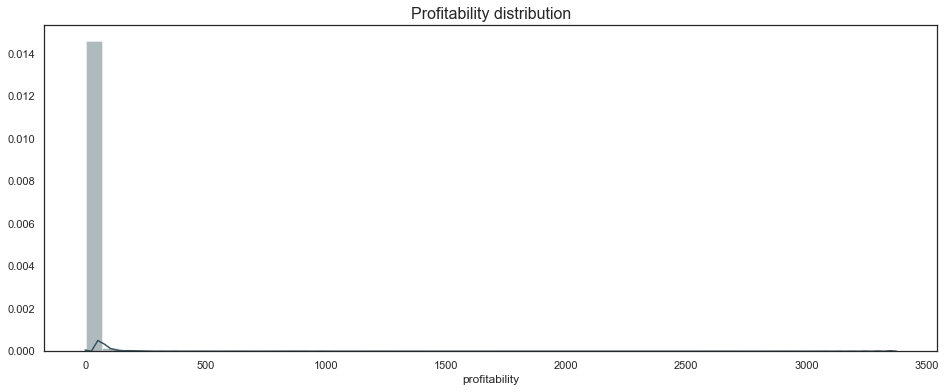

In [56]:
#looking at the profitability distribution
plt.figure(figsize=(16,6))
sns.distplot(data.profitability)
plt.title('Profitability distribution', fontsize=16)

We can see that there are a lot of outliers. If we look at our profitability formula, it can also be interpreted as the price multiplied by the occupancy percentage (total nights stayed / age). As such, profitability per observation should be less than that observations price.

In [57]:
#number of observations where the profitability is greater than the price
len(data[data.profitability >= data.price])

34

There are 34 observations with profitability values greater than the price. According to research, the average estimated occupancy is around 20% for Amsterdam (http://insideairbnb.com/amsterdam/#:~:text=Airbnb%20reported%203.9%20nights%20as,based%20on%20the%20available%20data). We will give lee way for listings that perform better than the average, and consider listings where the profitability is less than or equal to 35% of that listings price. There are 446 listings where the profitability exceeds 35% of the price.

In [58]:
len(data[data.profitability > (0.35*data.price)])

446

In [59]:
#selecting data with less than 35% occupancy
data = data[data.profitability <= (0.35*data.price)]

#resetting dataframe index
data.index = range(len(data))

In [60]:
data.describe()

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,host_id,host_acceptance_rate,superhost,host_identity_verified,instant_bookable,is_location_exact,age,profitability,weekly_special,monthly_special,cleaning_ratio,security_ratio,Internet,Wifi,Buzzer/wireless intercom,Safety card,Essentials,24-hour check-in,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Ethernet connection,Kitchen,Long term stays allowed,Private living room,Well-lit path to entrance,Pets live on this property,Smoking allowed,Pets allowed,Shower gel,Baby bath,Crib,Children’s books and toys,Pack ’n Play/travel crib,Room-darkening shades,Pocket wifi,Pool,Window guards,Cleaning before checkout,Wheelchair accessible,Ground floor access,Dog(s),Gym,Firm mattress,Air conditioning,Washer/Dryer,Changing table,Stair gates,Doorman,Other pet(s),Table corner guards,Disabled parking spot,Air purifier,flex_cancellation
count,1.034100e+04,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,1.034100e+04,7543.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000
mean,1.561677e+07,52.365834,4.889221,2.756697,1.161735,1.371918,1.671212,139.981240,123.296200,215.845566,2.748670,63.801663,35.512523,95.430519,4.840869e+07,75.056344,0.202108,0.429262,0.234600,0.713857,1232.170003,9.087021,0.159656,0.087999,0.116843,0.608204,0.392032,0.980563,0.152500,0.121942,0.971086,0.099604,0.202785,0.254714,0.045644,0.886278,0.125616,0.169133,0.009767,0.059762,0.055701,0.074944,0.042549,0.031622,0.065371,0.108500,0.041195,0.053863,0.040518,0.003191,0.017310,0.020017,0.048738,0.000387,0.009477,0.008703,0.001547,0.046320,0.000097,0.036070,0.022338,0.002708,0.004062,0.003578,0.000580,0.000193,0.180447
std,9.887985e+06,0.016139,0.035317,1.093052,0.337995,0.809853,1.252700,57.719716,311.608935,775.997496,2.465738,108.039297,54.349010,4.518192,6.111809e+07,29.499388,0.401592,0.494995,0.423769,0.451979,618.236896,9.205077,0.366304,0.283307,0.109059,2.335460,0.488227,0.138062,0.359522,0.327234,0.167573,0.299485,0.402093,0.435722,0.208721,0.317489,0.331433,0.374887,0.098349,0.237057,0.229354,0.263314,0.201848,0.174999,0.247191,0.311026,0.198751,0.225759,0.197181,0.056403,0.130429,0.140066,0.215330,0.019665,0.096891,0.092889,0.039306,0.210188,0.009834,0.186473,0.147788,0.051967,0.063603,0.059712,0.024082,0.013906,0.384578
min,2.818000e+03,52.289270,4.763260,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,6.000000,53.000000,3.159000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,183.000000,0.101022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.171776e+06,52.355630,4.863210,2.000000,1.000000,1.000000,1.000000,99.000000,0.000000,0.000000,2.000000,0.000000,10.000000,93.000000,7.594884e+06,58.000000,0.000000,0.000000,0.000000,0.000000,740.000000,3.287810,

In [61]:
#removing outliers to remove noise from our model
data = data[data.profitability<30]

Text(0.5, 1.0, 'Profitability Distribution Ammended')

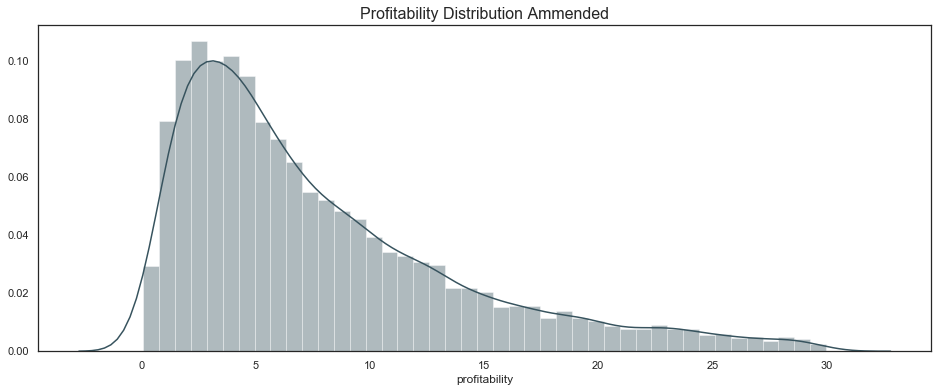

In [62]:
#replotting the profitability distribution
plt.figure(figsize=(16,6))
sns.distplot(data.profitability[data.profitability<30])
plt.title('Profitability Distribution Ammended', fontsize=16)

The profitability distribution is highly skewed to the right. This is expected, as we can expect a select number of listings to do exceptionally well. 

As discussed, popularity is dependent on price. We will display this relationship below before delving into the exploratory analysis.

Text(0.5, 1.0, 'Price vs. Number of Reviews')

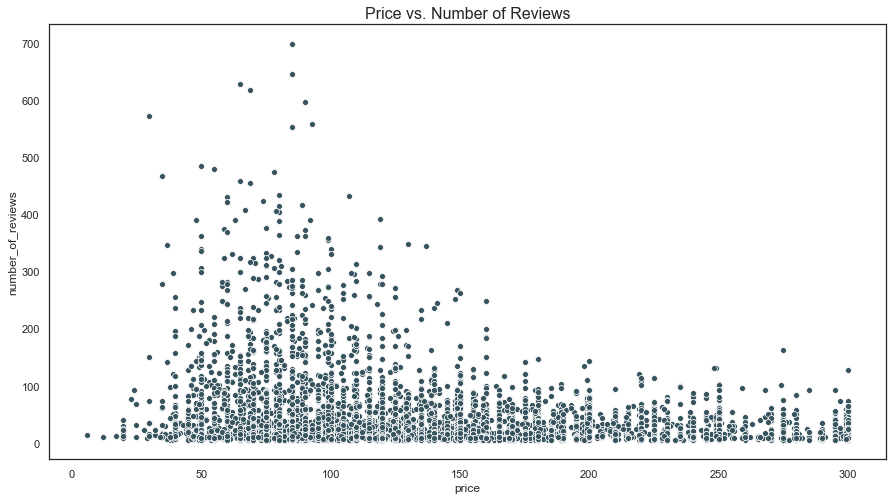

In [63]:
#plotting price against number of reviews
plt.figure(figsize=(15,8))
sns.scatterplot(x=data.price, y=data.number_of_reviews)
plt.title('Price vs. Number of Reviews', fontsize=16)

As we can see, very cheap apartments don't garner a lot of reviews, and neither do highly expensive listings. There is however an optimal range in the affordable region. This range has the highest profitable listings.

### 6.2 Property Location
In this section, we will examine what impact property location has on profitability.

Text(0.5, 0, 'Neihgbourhood Group')

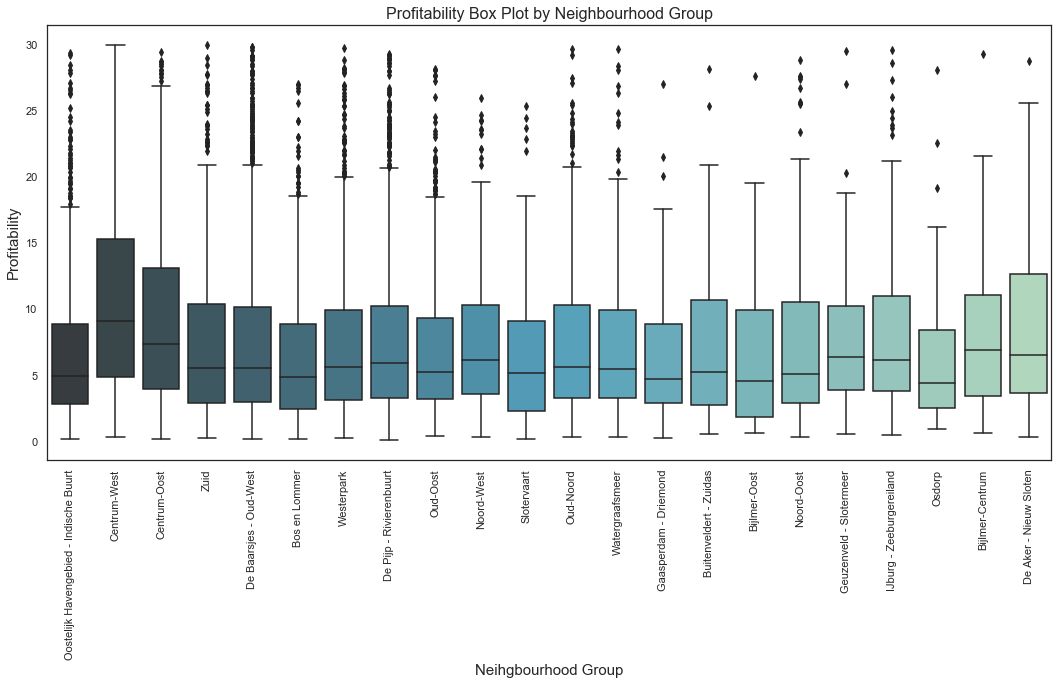

In [64]:
#relationship between neihgbourhood_cleansed and profitability
plt.figure(figsize=(18,8))
sns.boxplot(x='neighbourhood_cleansed',y='profitability', data=data, palette='GnBu_d')
plt.title('Profitability Box Plot by Neighbourhood Group', fontsize=16)
plt.xticks(rotation=90, fontsize=11)
plt.ylabel('Profitability',fontsize=15)
plt.xlabel('Neihgbourhood Group',fontsize=15)

- Profitability appears to be distributed differently amongst neighbourhood groups, indicating that there is a correlation between neihgbourhood groups and listing profitability
- Centrum-West and Centrum-Oost stand out as the most profitable areas - this is expected as they are areas in the city centre

Text(0.5, 0, 'Neihgbourhood')

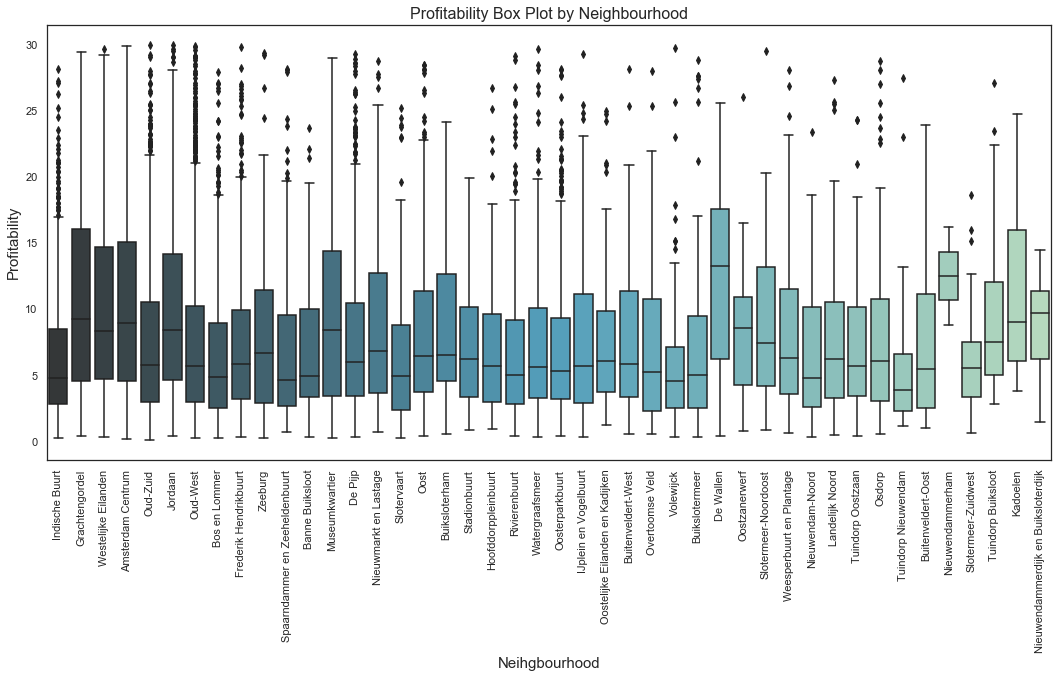

In [65]:
#relationship between neighbourhood and profitability
plt.figure(figsize=(18,8))
sns.boxplot(x='neighbourhood',y='profitability', data=data, palette='GnBu_d')
plt.title('Profitability Box Plot by Neighbourhood', fontsize=16)
plt.xticks(rotation=90, fontsize=11)
plt.ylabel('Profitability',fontsize=15)
plt.xlabel('Neihgbourhood',fontsize=15)

- Again, probability distributions differ according to neighbourhoods reinstating the correlation between location and profitability
- 'De Wallen' known as the Red Light District appears to be quite profitable, an unexpected relationship (perhaps tourists want to be near nightlife)

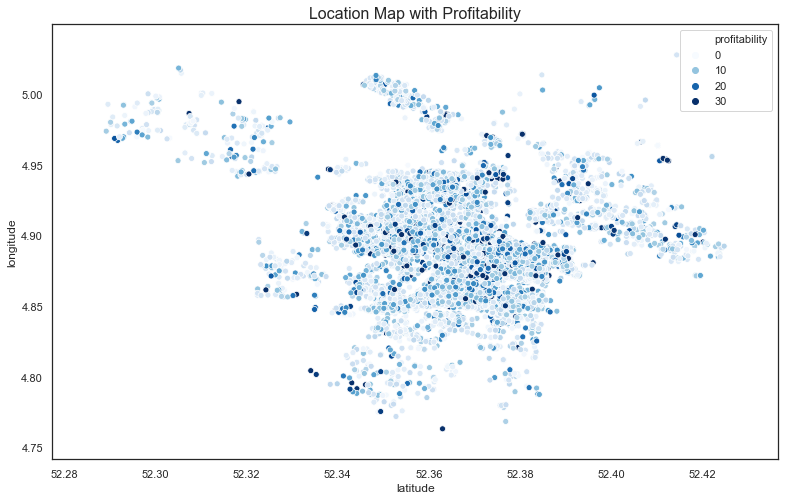

In [66]:
#plotting listings by longitude and latitude and setting the hue to profitability
plt.figure(figsize=(13,8))
plt.title('Location Map with Profitability', fontsize=16)
sns.scatterplot(x=data.latitude, y=data.longitude, hue=data.profitability, palette='Blues', hue_norm=(0,25))

- The map above visually demonstrates the location of profitable properties in Amsterdam 
- The most profitable areas are centralized in the city centre (darker marker points)

##### Conclusion on Location: Location has a definite impact on the profitability of Airbnb listings.

### 6.3 Property Characteristics
In this section, we will explore what property chartacteristics influence profitability.

##### 6.3.1 Bedrooms and Bathrooms

Text(0.5, 8.959999999999994, 'Bedrooms')

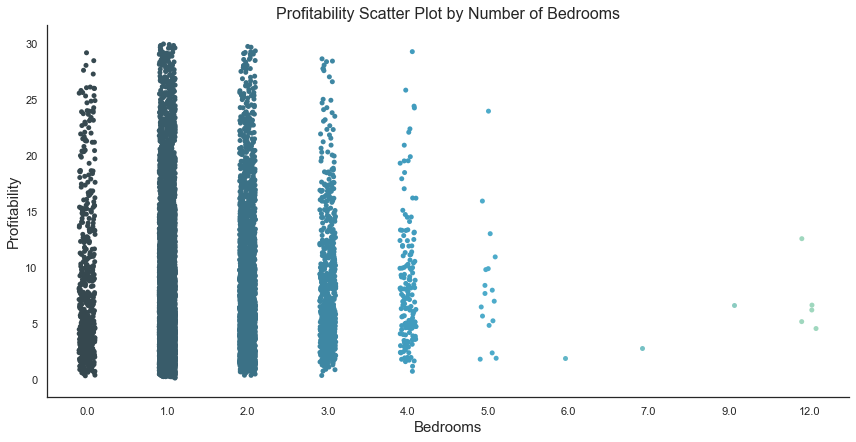

In [67]:
#catplot of profitability by number of beds
sns.catplot(x='bedrooms',y='profitability', data=data, palette='GnBu_d', height=6, aspect=2)
plt.title('Profitability Scatter Plot by Number of Bedrooms', fontsize=16)
plt.ylabel('Profitability',fontsize=15)
plt.xlabel('Bedrooms',fontsize=15)

In [68]:
#we will remove bedroom outliers and look at properties with 5 or less bedrooms
data = data[data.bedrooms<=5]

- High concentration of 1 bedrooms in the upper profitability region

Text(0.5, 8.960000000000022, 'Beds')

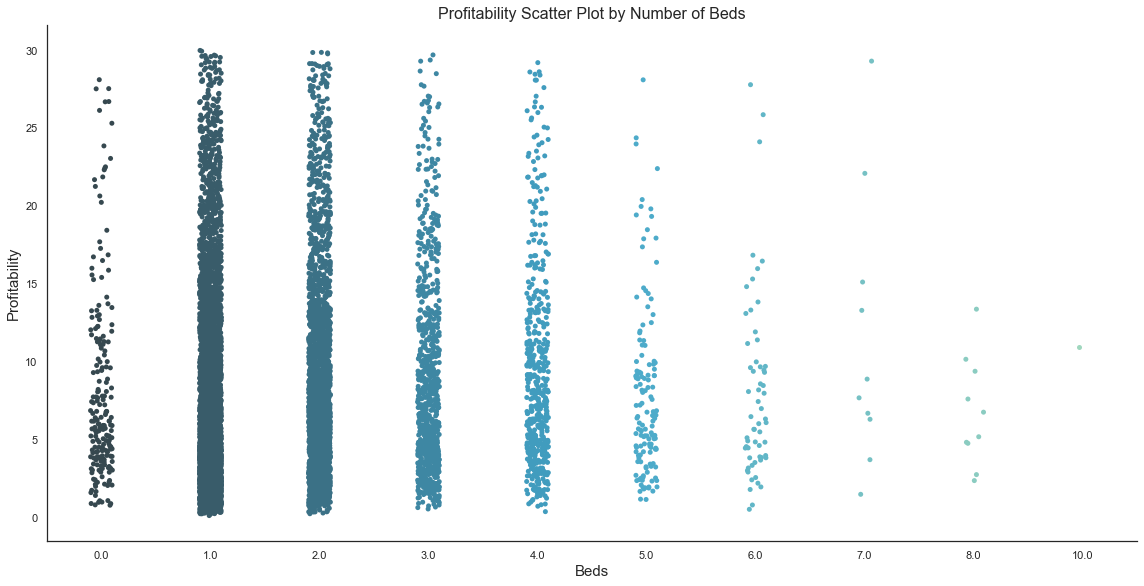

In [69]:
#catplot of profitability by number of beds
sns.catplot(x='beds',y='profitability', data=data, palette='GnBu_d', height=8, aspect=2)
plt.title('Profitability Scatter Plot by Number of Beds', fontsize=16)
plt.ylabel('Profitability',fontsize=15)
plt.xlabel('Beds',fontsize=15)

- High concentration of listings with 1 and 2 beds
- 1 to 4 beds have the greatest profitability range - We will explore this with a distribution plot

In [70]:
#removing outliers with more than 8 beds
data = data[data.beds<8]

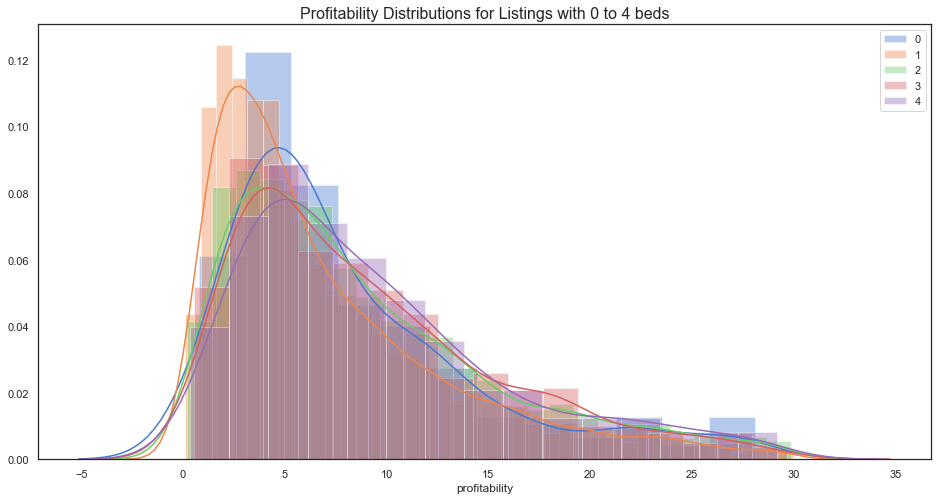

In [71]:
#distplot of profitability by number of beds - limiting profitability to <50 for better visuals
sns.set_palette('muted')
plt.figure(figsize=(16,8))
for i in range(0,5):
    sns.distplot(data.profitability[(data.beds == i) & (data.profitability<50)])
plt.title('Profitability Distributions for Listings with 0 to 4 beds', fontsize=16)    
plt.legend(labels=range(0,5))
sns.set_palette('GnBu_d')

- Having 3 or 4 beds appears to slightly increase your probability of having a profitable apartment

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text yticklabel objects>)

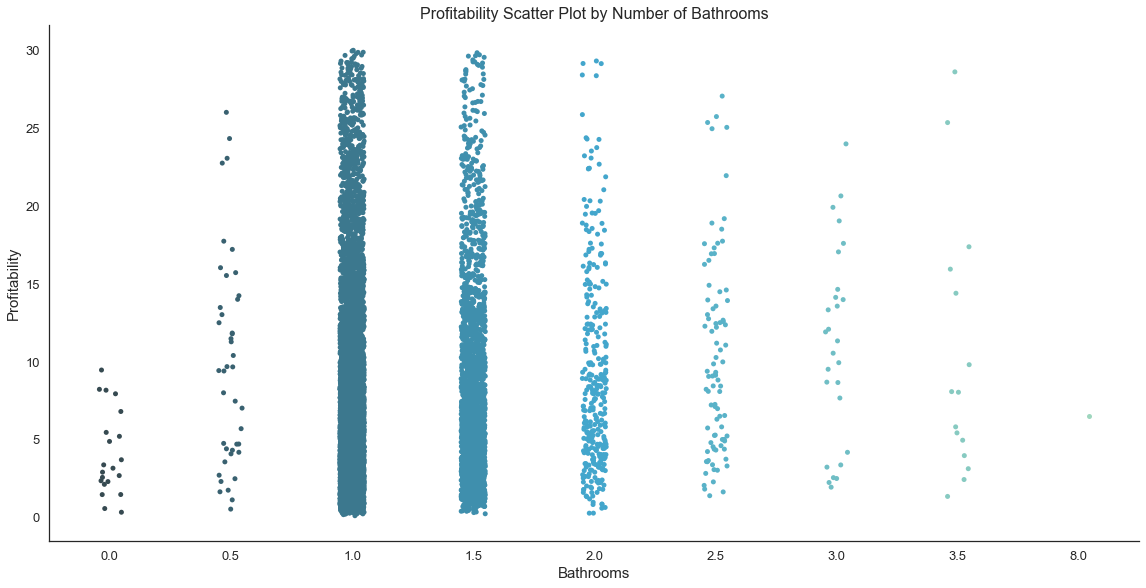

In [72]:
#catplot of profitability by number of bathrooms
sns.catplot(x='bathrooms',y='profitability', data=data, palette='GnBu_d', height=8, aspect=2)
plt.title('Profitability Scatter Plot by Number of Bathrooms', fontsize=16)
plt.ylabel('Profitability',fontsize=15)
plt.xlabel('Bathrooms',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

- High density of properties with 1 & 1.5 bathrooms
- Not many observations with more than 2 bathrooms - difficult to assess influence of relationship between number of bathrooms and profitability

In [73]:
#removing outlier of 8 bathrooms
data = data[data.bathrooms <4]

#### 6.3.2 Property Type

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text yticklabel objects>)

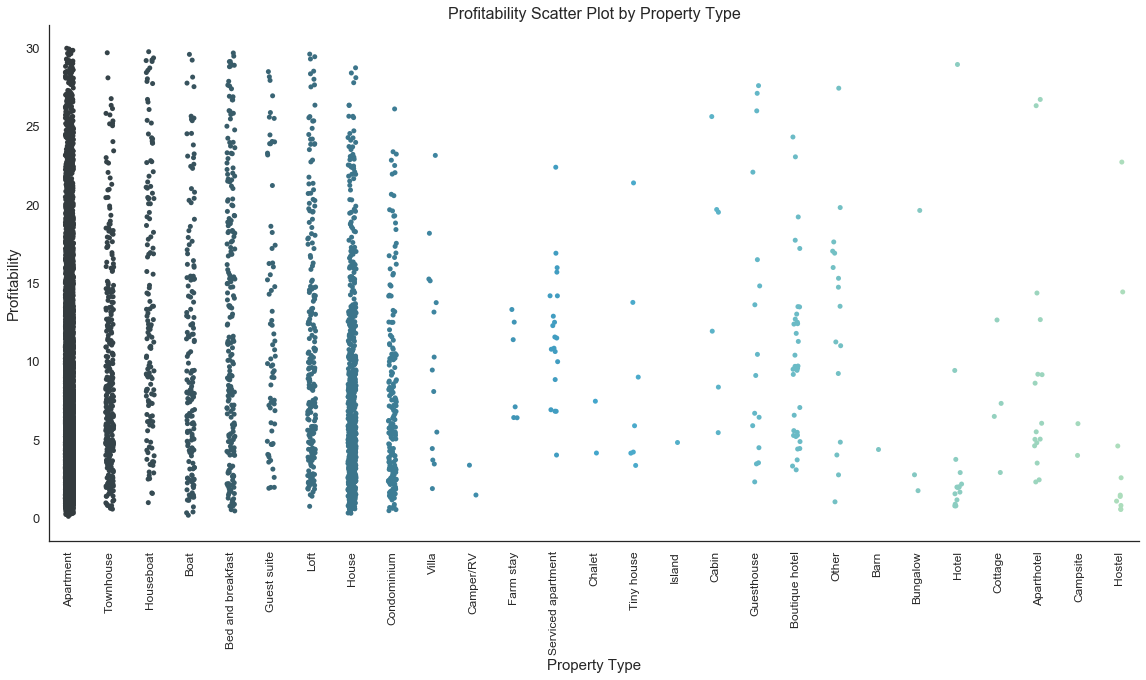

In [74]:
#catplot of profitability by Property Type
sns.catplot(x='property_type',y='profitability', data=data, palette='GnBu_d', height=8, aspect=2)
plt.title('Profitability Scatter Plot by Property Type', fontsize=16)
plt.ylabel('Profitability',fontsize=15)
plt.xlabel('Property Type',fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=13)

- High density of Apartment listings
- Apartments have the greatest profitability range

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text yticklabel objects>)

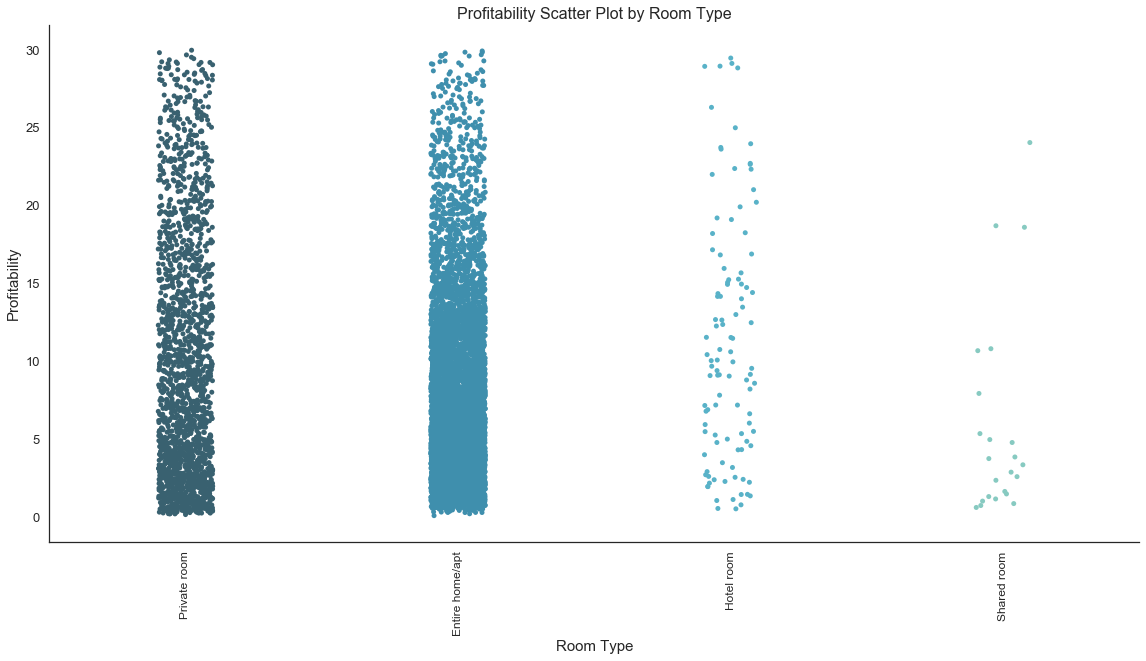

In [75]:
#catplot of profitability by Room Type
sns.catplot(x='room_type',y='profitability', data=data, palette='GnBu_d', height=8, aspect=2)
plt.title('Profitability Scatter Plot by Room Type', fontsize=16)
plt.ylabel('Profitability',fontsize=15)
plt.xlabel('Room Type',fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=13)

- High density of private room and entire/home listings. Let's explore the profitability distributions for these two in a distplot.

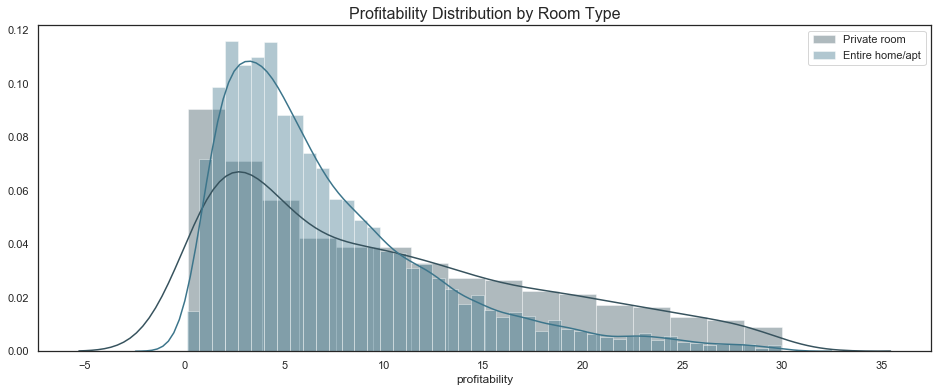

In [76]:
#Profitability Distribution for Private Rooms and Entire Homes/Apartments
plt.figure(figsize=(16,6))
room_types = ['Private room','Entire home/apt']
for room in room_types:
    sns.distplot(data.profitability[data.room_type==room])
plt.title('Profitability Distribution by Room Type', fontsize=16)
plt.legend(labels=room_types)

- Private rooms appear to have a higher probability of a higher profitability in comparison to entire homes/apartments

#### 6.3.4 Airbnb Specific Features

(array([0, 1]), <a list of 2 Text xticklabel objects>)

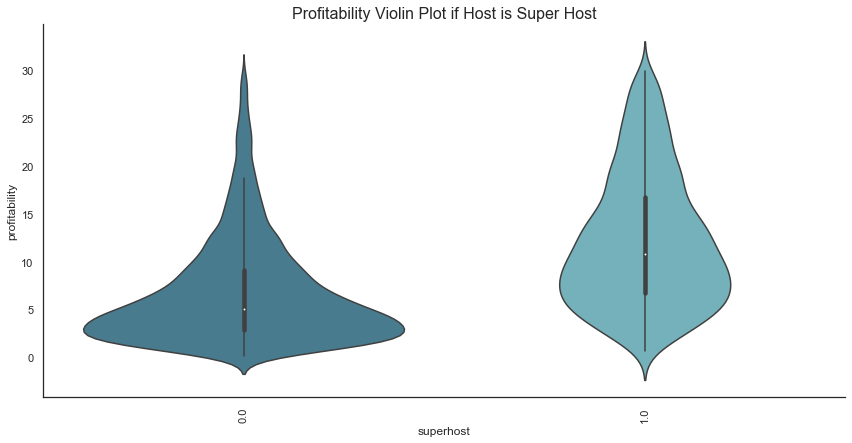

In [77]:
#relationship between superhost and profitability
sns.catplot(x='superhost',y='profitability', data=data, height=6, aspect=2, palette='GnBu_d', kind='violin')
plt.title('Profitability Violin Plot if Host is Super Host', fontsize=16)
plt.xticks(rotation=90)

- Being a superhost appears to have its benefits (value=1). Superhost listings have a greater mean and variance in comparison to non-superhost listings.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

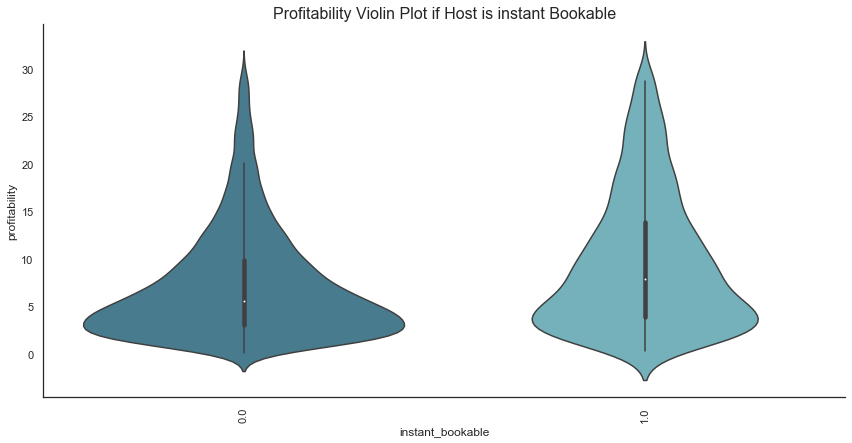

In [78]:
#relationship between superhost and instant_bookable
sns.catplot(x='instant_bookable',y='profitability', data=data, height=6, aspect=2, palette='GnBu_d', kind='violin')
plt.title('Profitability Violin Plot if Host is instant Bookable', fontsize=16)
plt.xticks(rotation=90)

- Instant bookable listings appear to be more profitable than non-instant bookable listings.

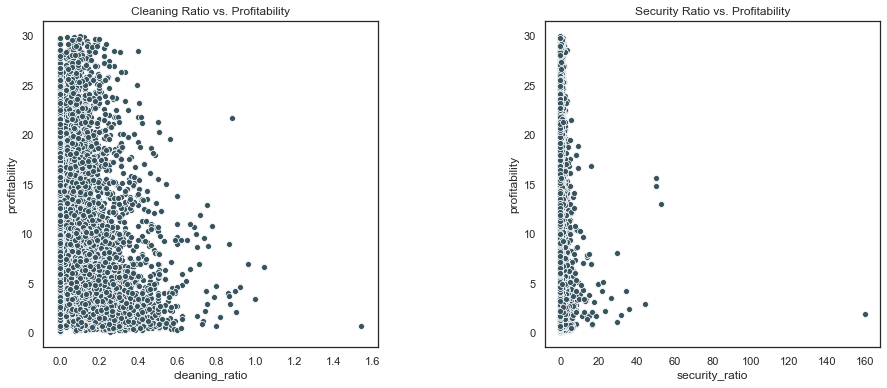

In [79]:
#relationship between cleaning ratio, security ratio and profitability
fig = plt.figure(figsize=(15,6))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

plt.subplot(1,2,1)
plt.title('Cleaning Ratio vs. Profitability')
sns.scatterplot(x=data.cleaning_ratio, y=data.profitability)

plt.subplot(1,2,2)
plt.title('Security Ratio vs. Profitability')
sns.scatterplot(x=data.security_ratio, y=data.profitability)

There are a few outliers in our cleaning ratio and security ratio plots. We will drop observations with a cleaning ratio greater than 1.2, and security ratio greater than 40 and replot these graphs.

In [80]:
#removing outliers
data = data[data.cleaning_ratio < 1.2]
data = data[data.security_ratio < 25]

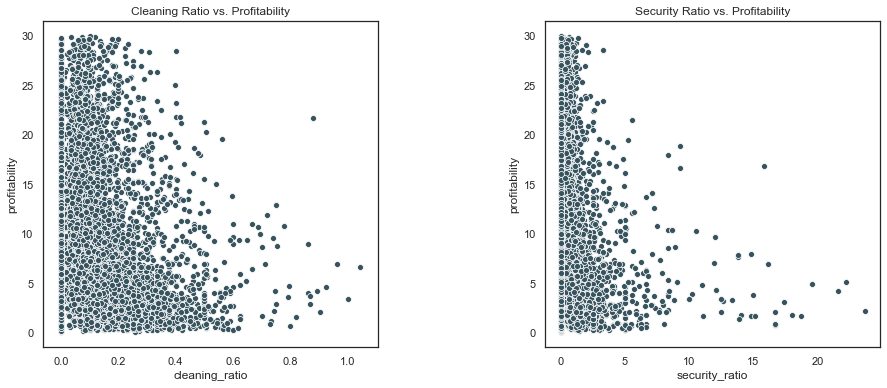

In [81]:
#Replotting relationship between cleaning ratio, security ratio and profitability
fig = plt.figure(figsize=(15,6))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

plt.subplot(1,2,1)
plt.title('Cleaning Ratio vs. Profitability')
sns.scatterplot(x=data.cleaning_ratio, y=data.profitability)

plt.subplot(1,2,2)
plt.title('Security Ratio vs. Profitability')
sns.scatterplot(x=data.security_ratio, y=data.profitability)

- There is a clear exponential relationship between cleaning ratio and profitabiltiy, and the same relationship is observed for the security ratio
- Customers are more likely to rent out listings where the cleaning and security ratios are low.

In [82]:
data.head()

,id,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,cancellation_policy,host_id,host_acceptance_rate,superhost,host_identity_verified,instant_bookable,is_location_exact,age,profitability,weekly_special,monthly_special,cleaning_ratio,security_ratio,Internet,Wifi,Buzzer/wireless intercom,Safety card,Essentials,24-hour check-in,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Ethernet connection,Kitchen,Long term stays allowed,Private living room,Well-lit path to entrance,Pets live on this property,Smoking allowed,Pets allowed,Shower gel,Baby bath,Crib,Children’s books and toys,Pack ’n Play/travel crib,Room-darkening shades,Pocket wifi,Pool,Window guards,Cleaning before checkout,Wheelchair accessible,Ground floor access,Dog(s),Gym,Firm mattress,Air conditioning,Washer/Dryer,Changing table,Stair gates,Doorman,Other pet(s),Table corner guards,Disabled parking spot,Air purifier,stay_term,price_interval,flex_cancellation
0,2818,Indische Buurt,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Apartment,Private room,2,1.5,1.0,2.0,59.0,0.0,1500.0,3,158,278,2009-03-30,2020-02-14,98.0,strict_14_with_grace_period,3159,100.0,1.0,0.0,1.0,0.0,4020,12.240299,0,1,0.338983,1.129944,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Short_term,"(50.1, 64.8]",0
1,9693,Grachtengordel,Centrum-West,52.37802,4.89270,Apartment,Entire home/apt,2,1.5,1.0,1.0,119.0,780.0,1960.0,3,17,55,2010-04-05,2018-06-29,99.0,moderate,32366,92.0,1.0,1.0,1.0,1.0,3649,5.380926,1,1,0.126050,0.420168,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Short_term,"(108.9, 123.6]",0
2,20168,Grachtengordel,Centrum-Oost,52.36509,4.89354,Townhouse,Private room,2,1.0,1.0,1.0,100.0,0.0,0.0,1,31,340,2010-03-02,2020-04-09,89.0,strict_14_with_grace_period,59484,97.0,0.0,0.0,1.0,1.0,3683,9.231605,0,0,0.000000,0.000000,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1_Night,"(94.2, 108.9]",0
3,27886,Westelijke Eilanden,Centrum-West,52.38761,4.89188,Houseboat,Private room,2,1.5,1.0,1.0,135.0,810.0,2500.0,2,235,217,2012-01-09,2020-03-02,99.0,strict_14_with_grace_period,97647,100.0,1.0,1.0,1.0,1.0,3005,19.497504,1,1,0.000000,0.000000,1,1,0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Short_term,"(123.6, 138.3]",0
4,28871,Amsterdam Centrum,Centrum-West,52.36719,4.89092,Apartment,Private room,2,1.0,1.0,1.0,75.0,499.0,1956.0,2,258,332,2010-08-22,2020-03-16,97.0,moderate,124245,96.0,1.0,1.0,0.0,1.0,3510,14.188034,1,1,0.000000,0.000000,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Short_term,"(64.8, 79.5]",0


Text(0.5, 1, 'Stay Term vs Profitability')

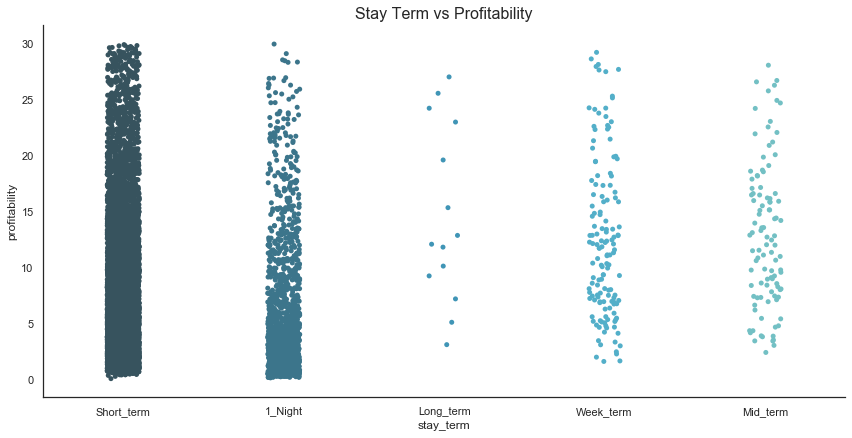

In [83]:
#Relationship between stay_term and profitability
sns.catplot(x='stay_term', y='profitability', data=data, height=6, aspect=2)
plt.title('Stay Term vs Profitability', fontsize=16)

- There is a high concentration of short-term (2 - 6 nights )listings and 1 night listings
- Shorter-term listings appear to achieve a greater degree of profitability than longer-term stays.

## 7. Modelling
We will now begin modelling our data. We will use the following algorithms to model our data:
1. Random Forest Regression
2. Boosted Random Forest Regression
3. Multilinear Regression

### 7.1 Data Preprocessing

##### 7.1.1 Train Test Split

In [84]:
from sklearn.model_selection import train_test_split

y = data.profitability
X = data.drop('profitability',axis=1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

#### 8.1.2 Remaining Missing Values
We have missing values in the host_acceptance_rate and neighbourhood features which we did not impute due to the risk of data leakage. We will now resolve this issue.

In [86]:
#importing SimpleImputer and creating an instance
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

In [87]:
#creating a dataframe with host_acceptance_rate only
host_accep_train = pd.DataFrame(X_train.host_acceptance_rate)
host_accep_test = pd.DataFrame(X_test.host_acceptance_rate)

#imputing host_acceptance rate
host_accep_train_imputed = imputer.fit_transform(host_accep_train)
host_accep_test_imputed = imputer.transform(host_accep_test)

#adding imputed columns to dataframe
X_train.drop('host_acceptance_rate',axis=1, inplace=True)
X_test.drop('host_acceptance_rate',axis=1, inplace=True)

X_train['host_acceptance_rate2'] = host_accep_train_imputed
X_test['host_acceptance_rate2'] = host_accep_test_imputed

C:\Users\Tasmiya Osman\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Tasmiya Osman\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Tasmiya Osman\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [88]:
#listing corresponding neighbourhood groups with neighbourhood missing values
neighbourhood_missing = X_train[X_train.neighbourhood.isnull()].neighbourhood_cleansed.value_counts().index

#finding the mode neighbourhood for each of the neighbhourhood groups that have missing neighbourhood values
mode_neighbourhood = []

for i in range(len(neighbourhood_missing)):
    mode_neighbourhood.append(X_train.neighbourhood[X_train.neighbourhood_cleansed == neighbourhood_missing[i]].mode())

In [89]:
#displaying the mode neighbourhood per neighbourhood group for missing data
mode_neighbourhood

[0    Landelijk Noord
 dtype: object,
 Series([], dtype: object),
 Series([], dtype: object),
 Series([], dtype: object),
 0    Buikslotermeer
 dtype: object]

The 0 and 4th values have mode neighbourhoods, the rest of the missing values will be set to the neighbourhood group

In [90]:
#imputing missing neighbourhood with the mode of the neighbourhood_cleansed category it belongs to
X_train.index = range(len(X_train))
neighbourhood = []

for i in range(len(X_train)):
    observation = X_train.loc[i]
    if type(observation.neighbourhood) == float:
        if observation.neighbourhood_cleansed == neighbourhood_missing[0]:
            neighbourhood.append('Landelijk Noord')
        elif observation.neighbourhood_cleansed == neighbourhood_missing[4]:
            neighbourhood.append('Buikslotermeer')
        else:
            neighbourhood.append(observation.neighbourhood_cleansed)
    else:
        neighbourhood.append(observation.neighbourhood)

#dropping old neighbourhood feature and adding new
X_train.drop('neighbourhood',axis=1, inplace=True)
X_train['neighbourhood'] = neighbourhood

C:\Users\Tasmiya Osman\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [91]:
#doing the same for the X_test set
X_test.index = range(len(X_test))
neighbourhood = []

for i in range(len(X_test)):
    observation = X_test.loc[i]
    if type(observation.neighbourhood) == float:
        if observation.neighbourhood_cleansed == neighbourhood_missing[0]:
            neighbourhood.append('Landelijk Noord')
        elif observation.neighbourhood_cleansed == neighbourhood_missing[4]:
            neighbourhood.append('Buikslotermeer')
        else:
            neighbourhood.append(observation.neighbourhood_cleansed)
    else:
        neighbourhood.append(observation.neighbourhood)

#dropping old neighbourhood feature and adding new
X_test.drop('neighbourhood',axis=1, inplace=True)
X_test['neighbourhood'] = neighbourhood

C:\Users\Tasmiya Osman\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### 8.1.4 Encoding Categorical Data
- We will Label Encode the pricing interval feature
- We will One Hot Encode the remaining categorical features

In [92]:
#Label Encoding Pricing Interval
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

X_train.price_interval = encoder.fit_transform(X_train.price_interval)
X_test.price_interval = encoder.transform(X_test.price_interval)

C:\Users\Tasmiya Osman\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [93]:
#import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [94]:
#first let's drop irrelevant columns such as id and cancellation_policy which has already been accounted for
cols_to_drop = ['id','first_review','last_review','host_id','cancellation_policy']
X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)

In [95]:
#listing categorical columns
cat_data = ['neighbourhood','neighbourhood_cleansed','property_type','room_type', 'stay_term']

#creating dataframe with encoded features
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[cat_data]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[cat_data]))
OH_cols_train.columns = OH_encoder.get_feature_names()
OH_cols_test.columns = OH_encoder.get_feature_names()

#removing old columns
X_train.drop(cat_data,axis=1,inplace=True)
X_test.drop(cat_data,axis=1,inplace=True)

#adding new columns
X_train = pd.concat([X_train, OH_cols_train],axis=1)
X_test = pd.concat([X_test, OH_cols_test],axis=1)

C:\Users\Tasmiya Osman\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [96]:
#dropping columns used to calculate profitability to avoid data leakage
profitability_cols = ['number_of_reviews','age','price','minimum_nights','monthly_price','weekly_price']
X_train.drop(profitability_cols, axis=1, inplace=True)
X_test.drop(profitability_cols, axis=1, inplace=True)

### 8.2 Random Forest Tree Model

Before we start modeling our data, we will create a scores list to record the mean_squared_error of each model. This will be used in our model evaluations.

In [97]:
mse = []

In [98]:
#importing algorithm and metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor()

In [99]:
#training the model
randomforest.fit(X_train, y_train)

#testing model
y_rf_predict = randomforest.predict(X_test)

#evaluating model
mse.append(mean_squared_error(y_test,y_rf_predict))

In [100]:
print(mse[0])

20.66397086499139


In [101]:
randomforestweights = pd.DataFrame(randomforest.feature_importances_, index=X_train.columns).sort_values(0, ascending=False)

In [102]:
randomforestweights.head(15)

,0
availability_365,0.163891
price_interval,0.111604
host_acceptance_rate2,0.110731
cleaning_ratio,0.091853
longitude,0.052131
superhost,0.048153
latitude,0.047594
review_scores_rating,0.031961
security_ratio,0.030429
beds,0.013731


### 8.3 XGBoost Regressor Model
XGBoost, like the Random Forest Tree algorithm, is a decision-tree based algorithm. However, XGBoost uses gradient descent to 
optimize the model's loss function.

In [103]:
#importing algorithm
from xgboost import XGBRegressor

xgb = XGBRegressor()

In [104]:
#training the model
xgb.fit(X_train, y_train)

#testing model
y_xgb_predict = xgb.predict(X_test)

#evaluating model
mse.append(mean_squared_error(y_test,y_xgb_predict))

[14:58:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [105]:
mse[1]

19.403229275538717

In [106]:
xgbweights = pd.DataFrame(xgb.feature_importances_, index=X_train.columns).sort_values(0, ascending=False)

In [107]:
xgbweights.head(15)

,0
superhost,0.166313
availability_365,0.081937
price_interval,0.057934
host_acceptance_rate2,0.047362
x1_Centrum-West,0.040835
x4_Short_term,0.038490
cleaning_ratio,0.035178
Long term stays allowed,0.033222
x3_Private room,0.031901
x4_1_Night,0.028210


- The XGB model performed better than the RandomForest model, with a lower MSE score of 19.40
- The features that have higher weights for this model align with the results of our exploratory data analysis

### 8.4 Multiple Linear Regression
- Linear regression assumes that there is a linear relationship between the feature and target - as such we must convert the exponential relationship between the cleaning and security ratios into a linear one
- Linear regression uses euclidean distance in computing, thus our data must be scaled

In [108]:
#import standard scaler to scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#scaling train and test sets
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [109]:
#importing linear regression algorithm
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [110]:
#training the model
linear.fit(X_train, y_train)

#testing model
y_lr_predict = linear.predict(X_test)

#evaluating model
mse.append(mean_squared_error(y_test,y_lr_predict))

In [111]:
mse[2]

22.475967812445482

In [112]:
coefficients = pd.DataFrame(linear.coef_, index=X_train.columns).sort_values(0, ascending=False)

In [113]:
coefficients.head(15)

,0
longitude,7.010650
x0_Overtoomse Veld,4.921769
x4_Long_term,4.774529
latitude,4.358215
x0_Slotervaart,3.939186
x1_Centrum-West,3.839617
x1_Oud-Oost,3.822198
x0_Nieuwendammerham,3.777645
x1_Centrum-Oost,3.679118
x2_Cabin,3.658752


- The Linear Regression model performed the worst, with the lowest MSE score
- The weighted features do not align with our data exploratory analysis, for example 'Overtoomse Veld' and 'Slotervaart' are highly weighted, but our analysis did not identify these areas as highly profitable
- Additionally Long-Term stays are weighted more than short-term stays, where as we found the opposite relationship during our analysis.

## 9. Model Evaluation

Let's begin by plotting the mean squared errors per model

In [120]:
models = ['RF','XGB','LR']

Text(0.5, 1.0, 'MSE per Model')

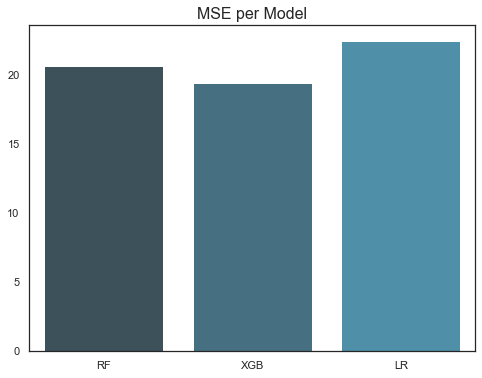

In [121]:
plt.figure(figsize=(8,6))
sns.barplot(x=models, y=mse)
plt.title('MSE per Model', fontsize=16)

- The XGB model performed the best
- The Linear Regression model performed the worst

Let's plot the distribution of the residuals per model

In [122]:
#getting residuals for RandomForest
results_RF = pd.DataFrame()
results_RF['test'] = y_test
results_RF['predict'] = y_rf_predict
results_RF['residual'] = y_rf_predict - y_test

#getting residuals for XGBoost
results_XGB = pd.DataFrame()
results_XGB['test'] = y_test
results_XGB['predict'] = y_xgb_predict
results_XGB['residual'] = y_xgb_predict - y_test

#getting residuals for Linear Regression
results_LR = pd.DataFrame()
results_LR['test'] = y_test
results_LR['predict'] = y_lr_predict
results_LR['residual'] = y_lr_predict - y_test

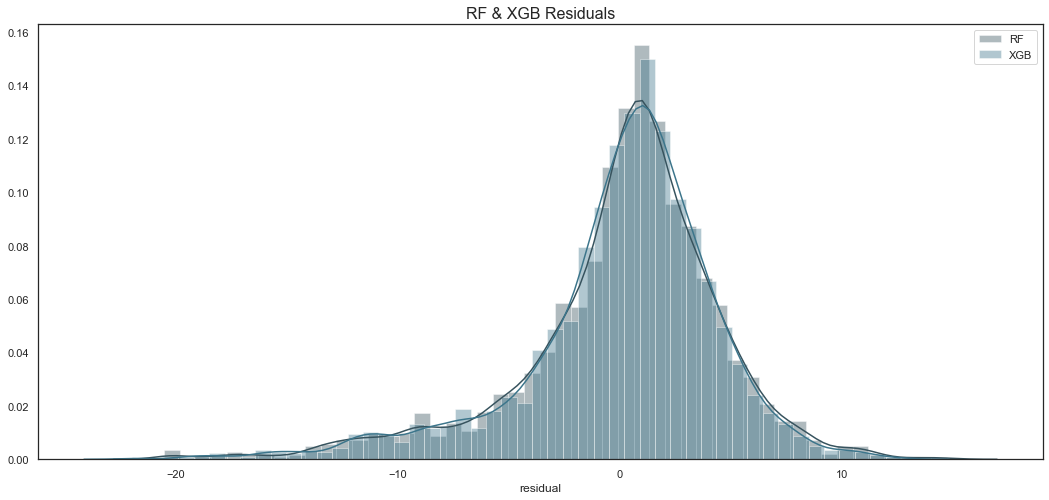

In [123]:
plt.figure(figsize=(18,8))
sns.distplot(results_RF.residual)
sns.distplot(results_XGB.residual)
plt.title('RF & XGB Residuals', fontsize=16)
plt.legend(labels=['RF','XGB'])

Text(0.5, 1.0, 'LR Residuals')

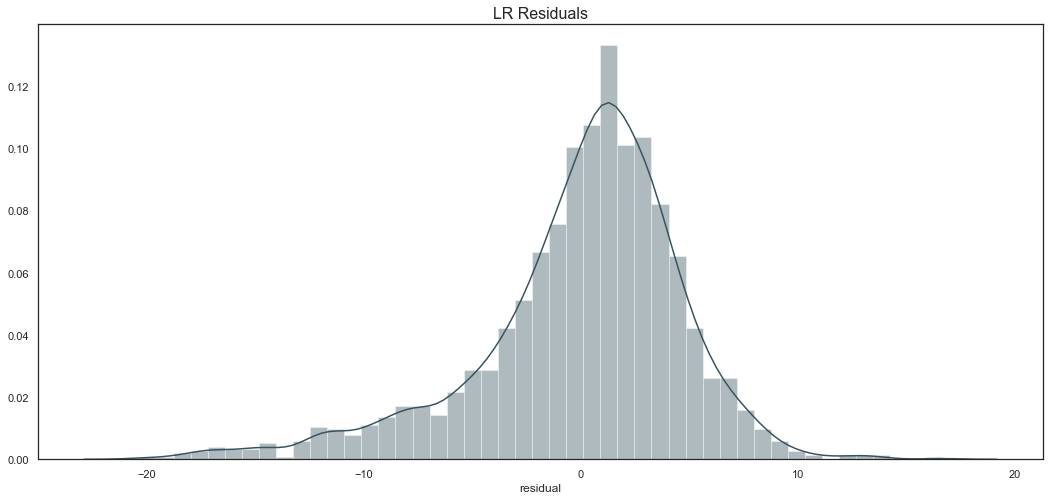

In [124]:
plt.figure(figsize=(18,8))
sns.distplot(results_LR.residual)
plt.title('LR Residuals', fontsize=16)

### Model Evaluation Findings:
1. The XGBoost algorithm proved to be the best model with an MSE of 19.4, with the Random Forest algorithm second scoring 20.65 and lastly, the Linear Regression algorithm scoring an MSE of 22.47.
2. Though the Random Forest and XGBoost models had similar Mean Squared Error scores, the weighting of features differed. The Random Forest model did not align with our exploratory data analysis, where as the XGBoost model did. For example, 1-Night Stays were weighted more than Short-Term stays in the Random Forest model. However, from our exploratory data analysis, we found that Short-Term stays were more profitable - which is represented in our XGB model's feature weightings.
3. The distribution of the Linear Regression residuals has more variation in comparison to the RF and XGB models.
4. The Random Forest and XGBoost models had a similar residuals distribution.
5. The residuals for XGBoost is skewed to the left. There is a long tail for negative residuals which indicates that the predicted value is less than the actual test value. This indicates that our model does not fair well with outliers, i.e. highly profitable listings. This could possibly be due to the fact that our model does not consider property aesthetics, which could have a high influence on the listing's profitability.
6. There is a lower probability of getting an over-estimated prediction is less than getting an under-estimated prediction. However, the model is not perfect. Over-estimations of 10 can be achieved, which is moderately high considering the range of profitability values.
7. The mean for the residuals are almost 0, which is promising.

## 10. Conclusions & Recommendations

### 10.1 The Model
The selected model for this problem statement is by default, the XGBoost model based on the model having the lowest MSE score, of 19,4. Additioanlly, the feture weights for the XGBoost aligned with the findings from the Exploratory Data Analysis, where as the Random Forest Regression and Linear Regression models did not. That being said, the model is not perfect. The residual distribution has a large range, and additionally has a reasonably high probability of underpredicting profitability values. This indicates that the features in our model do not wholely account for profitability variation. The model requires additional features to improve prediction which will make it more suitable for predicting Airbnb profitability.

### 10.2 Recommendations for Model Improvement
As mentioned, the current model does not account for all features that may explain target variation. This is expected, as the listing features are limited to physical specifications, and technical information. However, as a customer, visual aesthetics and decor of the property as expected to influence the customer's selection. Thus a key aspect to include in our features for improvement should be related to perceived visual aesthetics and decor. This may improve our model performance.
#### Examples of visual features to include could be:
- Quality of image resolutions
- Number of images per listing
- Property professionally photographed (True/False)
- Decor style


### 10.3 Inferences
Based on our model, we can however conclude the following inferences:
- Location impacts profitability, Centum-West is a location that our client may want to consider when purchasing their property.
- Short Term rentals are profitable - Our client may want to limit the minimum number of stays to between 2 and 6 nights.
- Having a private room listing appears to be more profitable than an entire apartment - If our client is purchasing a property with more than 1 room, leasing out each room as a private room is worth considering.
- Being a superhost has it's benefits - Airbnb customer's appear to prefer listings with a superhost, customers may view the superhost classification as a measure of experience quality. Thus it is advisable that our client ensures that becoming a superhost is a part of their property strategy in the long run.
- Cleaning ratio impacts profitability - Our client may want to keep the cleaning fee to as low as possible to increase popularity.
- Host acceptance rate also plays a role on profitability - Airbnb customers may potentially prefer properties with high acceptance rates to avoid a lengthy rental process.


